# Importing Dependencies

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Exploratory Data Analysis

In [223]:
sales = pd.read_csv("Train.csv")
sales.shape

(8523, 12)

In [224]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [225]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [226]:
# Dropping identifier columns 
sales.drop(columns=["Item_Identifier","Outlet_Identifier"], axis=1, inplace=True)

In [227]:
sales.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [228]:
## Spliting the DataSet into train and Test befor 

# Dealing with missing values

In [229]:
sales['Item_Weight'].fillna(sales['Item_Weight'].median(), inplace=True)

In [230]:
# Dropping missing values fron Outlet size
sales = sales.dropna(subset='Outlet_Size')

In [231]:
sales.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [232]:
sales.duplicated().sum()

0

In [233]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.827195,0.064505,141.256859,1995.794373,2322.688445
std,4.075754,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,9.800000,0.026681,94.012000,1987.000000,974.731200
50%,12.600000,0.052811,143.178600,1997.000000,1928.156800
75%,15.700000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [234]:
sales['Outlet_Establishment_Year'] = pd.to_datetime(sales['Outlet_Establishment_Year'], format='%Y')

In [235]:
sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3641
Regular    2076
LF          233
reg          82
low fat      81
Name: count, dtype: int64

We can see that there is an error in recording the data where low fat is represented by LF and low fat and Regular is represented by Reg as well. We must replace these value with a uniform representation

In [236]:
#Cleaning Item_Fat_Content 
replace = {"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"} 
for i, j in replace.items():
    sales['Item_Fat_Content']=sales['Item_Fat_Content'].str.replace(i,j)

In [237]:
sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3955
Regular    2158
Name: count, dtype: int64

# Univariate Analysis
- Histogram and Countplots
- The major goal here is to check how the data is distributed

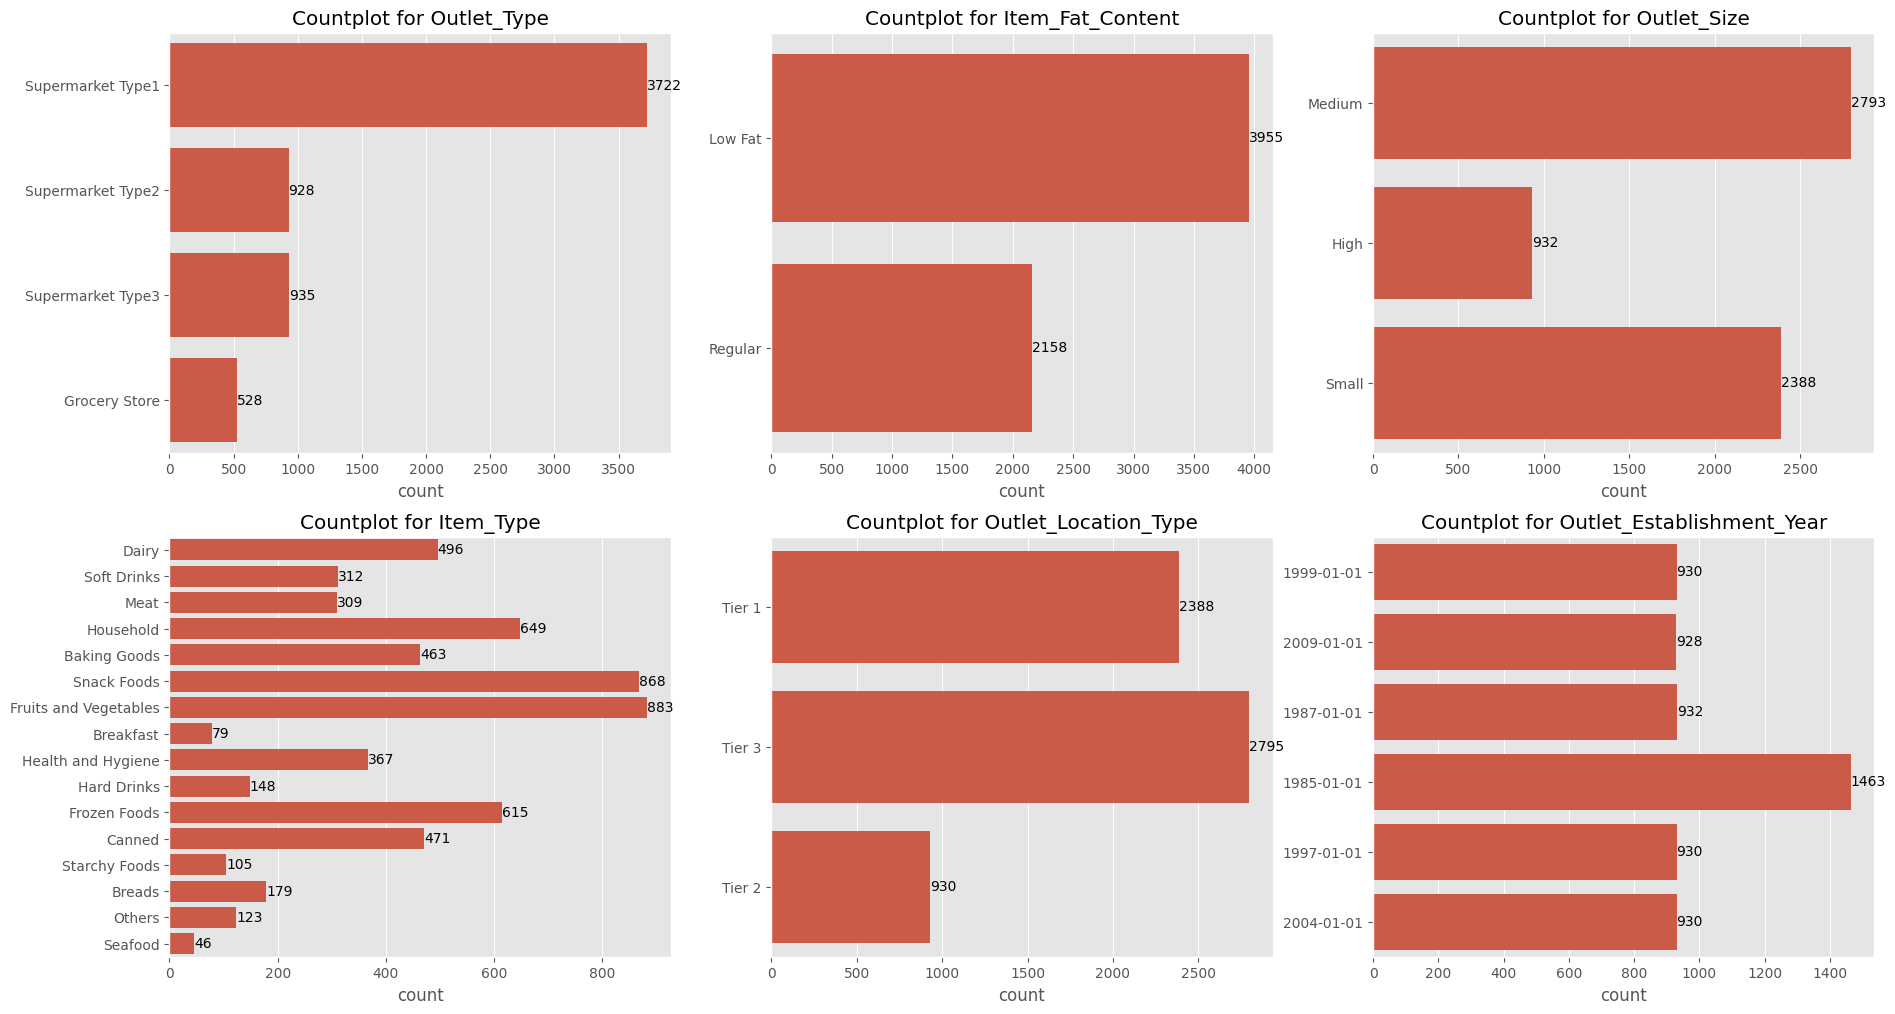

In [238]:
categorical_features = ['Outlet_Type','Item_Fat_Content','Outlet_Size','Item_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year']
plt.figure(figsize=(22,12))

for i in enumerate(categorical_features):
    plt.subplot(2,3, i[0]+1)
    ax = sns.countplot(sales[i[1]])
    for j in ax.containers:
        ax.bar_label(j)
    ax.set_title(f"Countplot for {i[1]}")
    ax.set_ylabel("")
plt.show()

- Except for outlet_Type and Item_Type most of our other categorical variables seem to have only minor data imbalance.
- Item_Type needs to be combined so that small frequency of item type are represented as "Others" 

# Ordinal Encoding features 

In [239]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder(categories=[['Small','Medium','High'],['Tier 3','Tier 2','Tier 1'],['Low Fat','Regular']])

In [240]:
sales[['Outlet_Size','Outlet_Location_Type','Item_Fat_Content']] = ord_encoder.fit_transform(sales[['Outlet_Size','Outlet_Location_Type','Item_Fat_Content']])

In [241]:
sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0.0,0.016047,Dairy,249.8092,1999-01-01,1.0,2.0,Supermarket Type1,3735.1380
1,5.920,1.0,0.019278,Soft Drinks,48.2692,2009-01-01,1.0,0.0,Supermarket Type2,443.4228
2,17.500,0.0,0.016760,Meat,141.6180,1999-01-01,1.0,2.0,Supermarket Type1,2097.2700
4,8.930,0.0,0.000000,Household,53.8614,1987-01-01,2.0,0.0,Supermarket Type1,994.7052
5,10.395,1.0,0.000000,Baking Goods,51.4008,2009-01-01,1.0,0.0,Supermarket Type2,556.6088


# Checking Linear Regression Assumption
- Linear relationship
- Multivariate Normality 
- Multicollearity 
- No Autocorrelation 
- No Heteroscedasticity

# Histogram

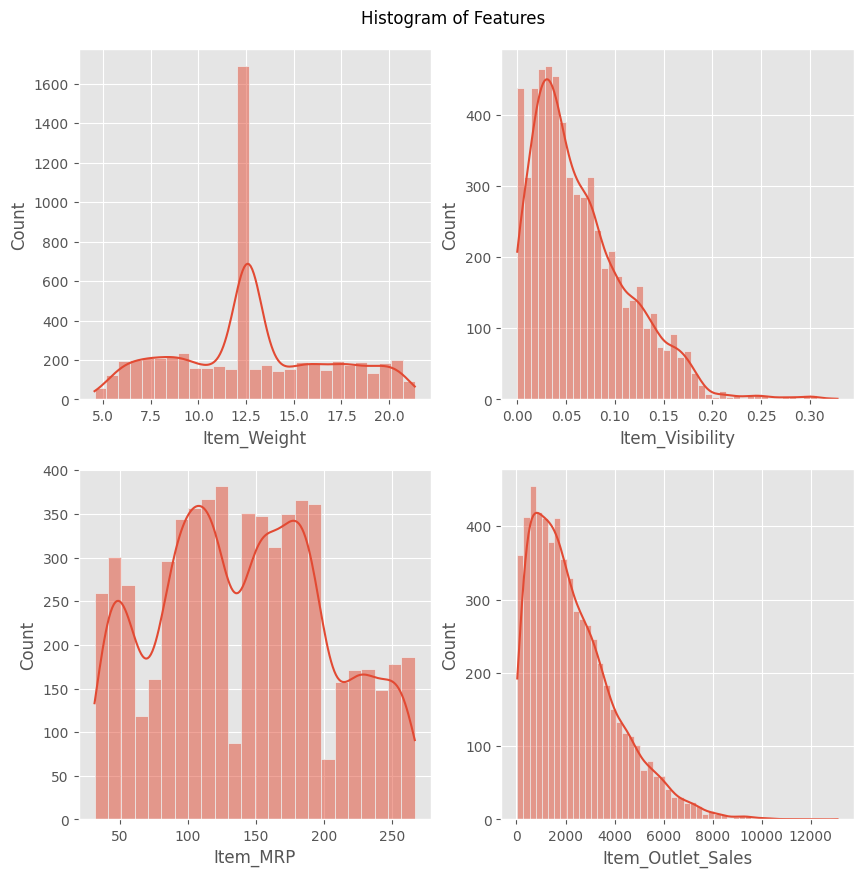

In [242]:
# Checking distribution of numeric features

numeric_features = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
plt.figure(figsize=(10,10))
plt.suptitle("Histogram of Features", y = 0.92)
for i in enumerate(numeric_features):
    plt.subplot(2,2, i[0]+1)
    ax = sns.histplot(sales[i[1]], kde=True)
plt.show()

- We can see that the data is not distributed normally. 
- Item visibility and outlet sales are right tailed while
- Item_Weight has data distribution that has peaked in the middle which was caused as the mean was used to replace the missing values  
- Item_MRP has thin tailed

In [243]:
sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0.0,0.016047,Dairy,249.8092,1999-01-01,1.0,2.0,Supermarket Type1,3735.1380
1,5.920,1.0,0.019278,Soft Drinks,48.2692,2009-01-01,1.0,0.0,Supermarket Type2,443.4228
2,17.500,0.0,0.016760,Meat,141.6180,1999-01-01,1.0,2.0,Supermarket Type1,2097.2700
4,8.930,0.0,0.000000,Household,53.8614,1987-01-01,2.0,0.0,Supermarket Type1,994.7052
5,10.395,1.0,0.000000,Baking Goods,51.4008,2009-01-01,1.0,0.0,Supermarket Type2,556.6088


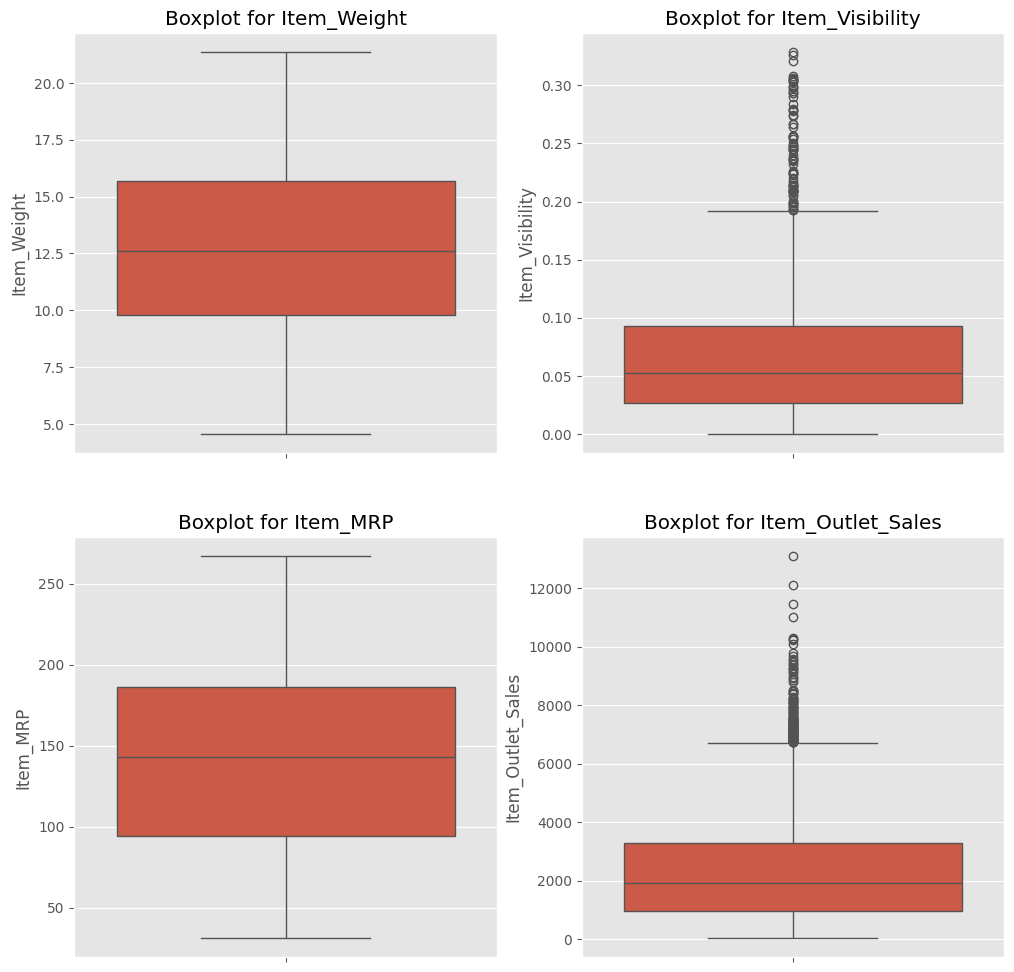

In [244]:
# Checking for outliers
numeric_features = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]

plt.figure(figsize=(12,12))

for i in enumerate(numeric_features):
    plt.subplot(2,2, i[0]+1)
    ax = sns.boxplot(sales[i[1]])
    ax.set_title(f"Boxplot for {i[1]}")
plt.show()

- Item visibility and outlet sales have a great deal of outlier

# Capping Outliers with IQR

In [245]:

p_25 = sales["Item_Visibility"].quantile(0.25)
p_75 = sales["Item_Visibility"].quantile(0.75) 
iqr = p_75 - p_25
up_lim = p_75 + 1.5 * iqr
low_lim = p_25 - 1.5 * iqr

In [246]:

sales['Item_Visibility'] = np.where(
    sales['Item_Visibility'] > up_lim,
    up_lim,
    np.where(
        sales['Item_Visibility']< low_lim,
        low_lim,
        sales['Item_Visibility']
    ))

# Function Transformation for normal distribution

In [247]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p, validate=True)

In [248]:
Sqrt_Item_Visibility = np.sqrt(sales['Item_Visibility'])
Log_Item_MRP = log_transformer.fit_transform(sales[['Item_MRP']])
Sqrt_Item_Weight = np.sqrt(sales['Item_Weight'])

In [249]:
sales['Item_Visibility'] = Sqrt_Item_Visibility
sales['Item_MRP'] = Log_Item_MRP
sales['Item_Weight'] = Sqrt_Item_Weight

# Transformed Data Distribution

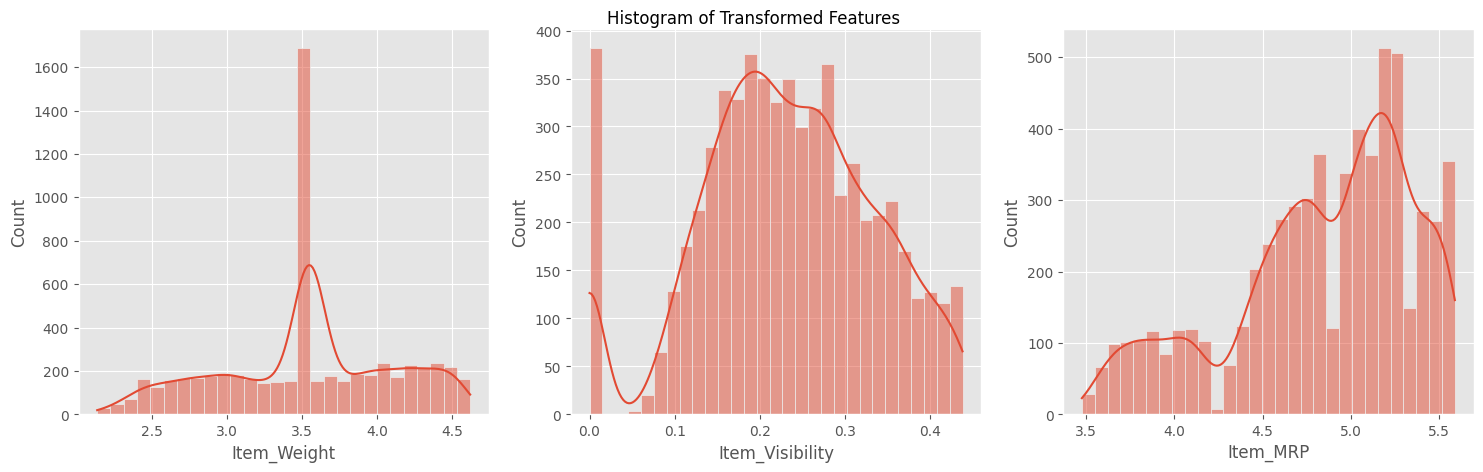

In [250]:
trns_features = ["Item_Weight", "Item_Visibility", "Item_MRP"]
plt.figure(figsize=(18,5))
plt.suptitle("Histogram of Transformed Features", y = 0.92)
for i in enumerate(trns_features):
    plt.subplot(1,3, i[0]+1)
    ax = sns.histplot(sales[i[1]], kde=True)
plt.show()

# Bivariate Analysis

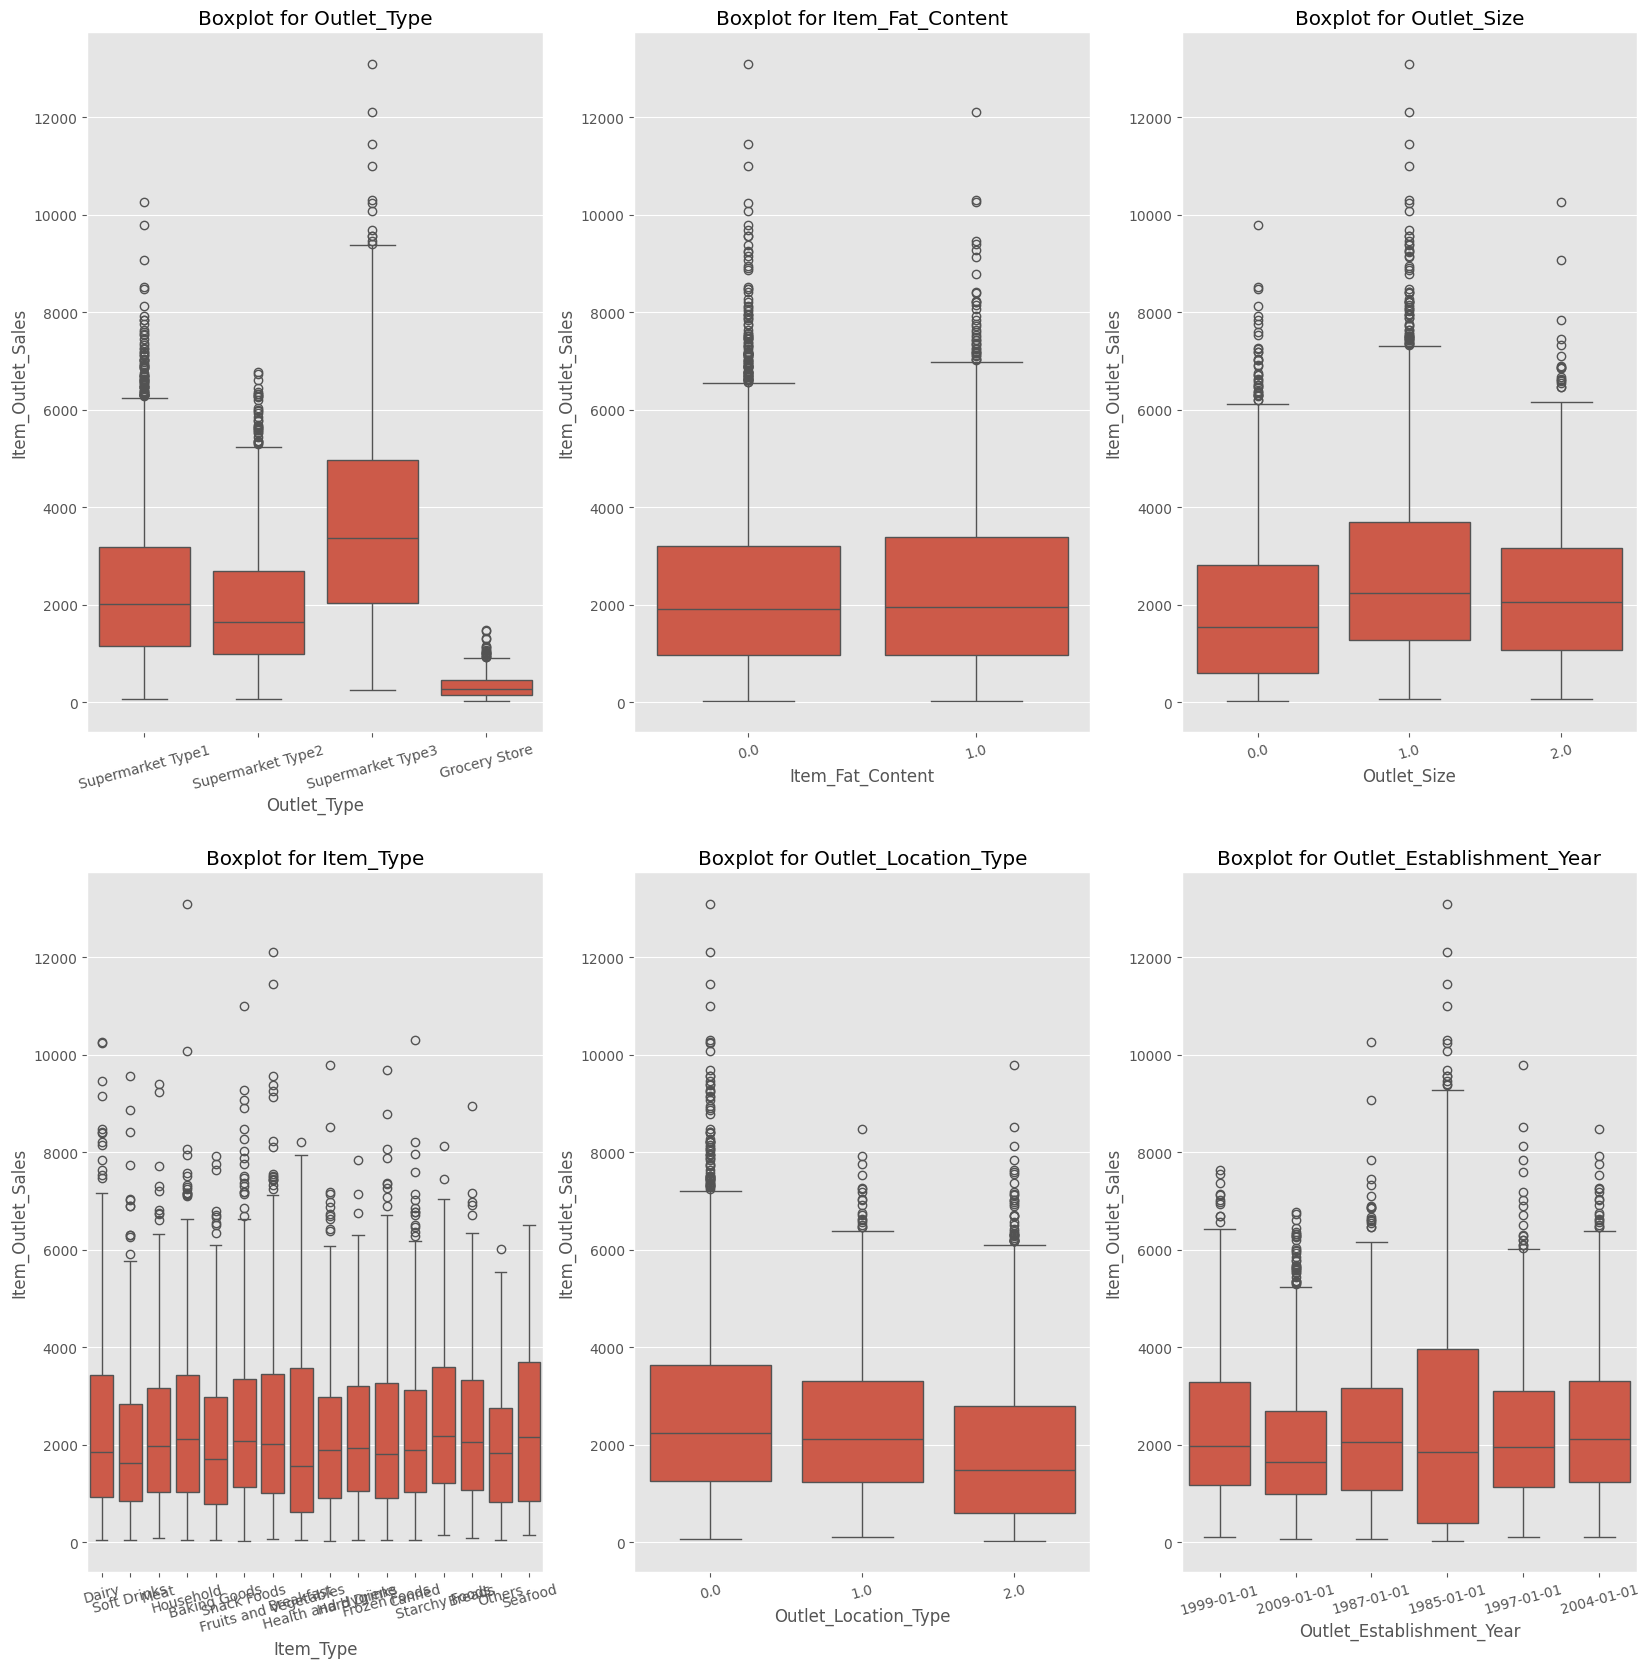

In [251]:
plt.figure(figsize=(20,20))

for i in enumerate(categorical_features):
    plt.subplot(2,3, i[0]+1)
    ax = sns.boxplot(sales, x= i[1], y = 'Item_Outlet_Sales')
    ax.set_title(f"Boxplot for {i[1]}")
    plt.xticks(rotation = 15)
plt.show()


# Multivariate Analysis

In [252]:
sales.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

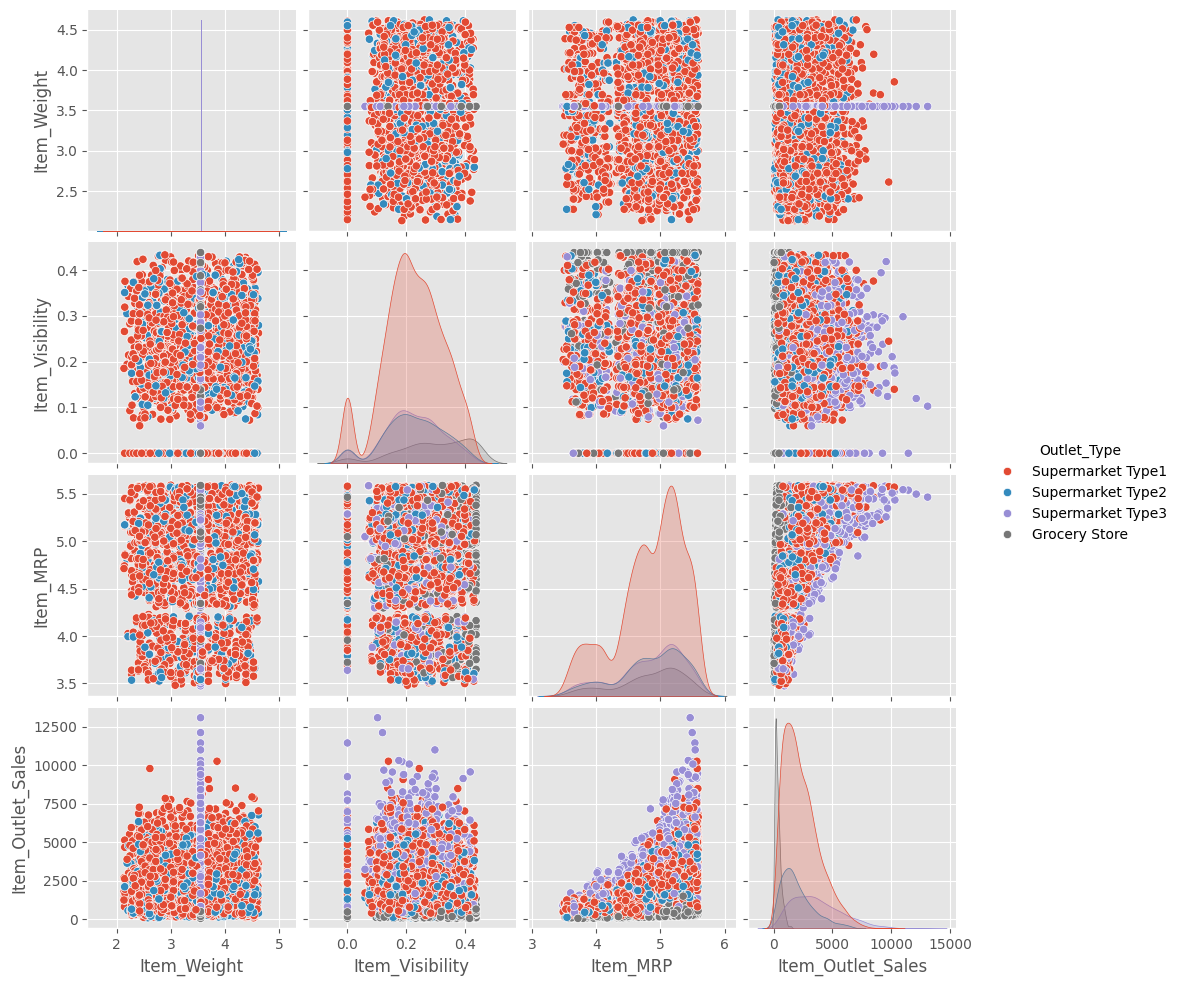

In [253]:
ax = sns.pairplot(sales, vars=['Item_Weight', 'Item_Visibility',
                        'Item_MRP','Item_Outlet_Sales'], 
                    hue="Outlet_Type")

- Our features do not display a clear sense of linear relationship

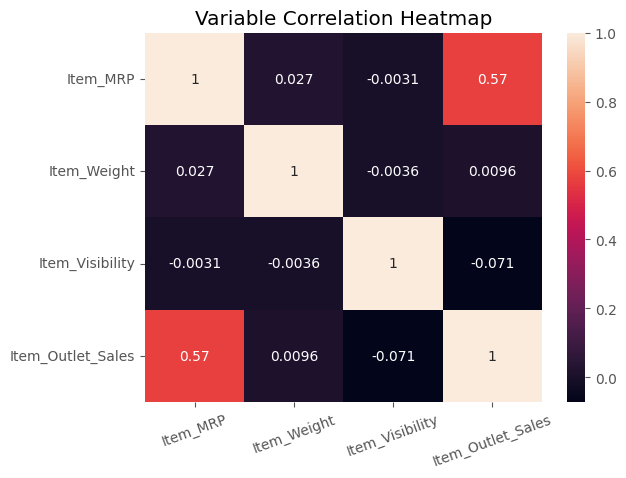

In [254]:
s_cor = sales[['Item_MRP','Item_Weight','Item_Visibility','Item_Outlet_Sales']].corr()
ax = sns.heatmap(s_cor,annot=True)
ax.set_title('Variable Correlation Heatmap')
plt.xticks(rotation = 20)
plt.show()

The data has acceptable levels of multicollinearity

# Developing Model

# Observation
- Must deal with missing value
- The numeric features need to be transformed using Function Transformer so that the distribution of data can change to a normal. 
- Outling data points needs to be removed using IQR method

In [255]:
val = sales['Item_Type'].value_counts()[:4].index
def grouping(x):
    if x in val:
        return x
    else:
        return "other"

sales['Item_Type'] = sales['Item_Type'].apply(grouping)
sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,3.049590,0.0,0.126678,other,5.524692,1999-01-01,1.0,2.0,Supermarket Type1,3735.1380
1,2.433105,1.0,0.138846,other,3.897299,2009-01-01,1.0,0.0,Supermarket Type2,443.4228
2,4.183300,0.0,0.129461,other,4.960170,1999-01-01,1.0,2.0,Supermarket Type1,2097.2700
4,2.988311,0.0,0.000000,Household,4.004810,1987-01-01,2.0,0.0,Supermarket Type1,994.7052
5,3.224128,1.0,0.000000,other,3.958922,2009-01-01,1.0,0.0,Supermarket Type2,556.6088


**One hot encoding Item_Type Feature**

In [256]:
typ = pd.get_dummies(sales['Item_Type'],drop_first=True).astype(int)

In [257]:
# Concating encoded feature and removing established date and Item_Type
sales = pd.concat([sales,typ],axis=1)
sales = sales.drop(['Item_Type','Outlet_Type','Outlet_Establishment_Year'], axis=True)
sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Fruits and Vegetables,Household,Snack Foods,other
0,3.049590,0.0,0.126678,5.524692,1.0,2.0,3735.1380,0,0,0,1
1,2.433105,1.0,0.138846,3.897299,1.0,0.0,443.4228,0,0,0,1
2,4.183300,0.0,0.129461,4.960170,1.0,2.0,2097.2700,0,0,0,1
4,2.988311,0.0,0.000000,4.004810,2.0,0.0,994.7052,0,1,0,0
5,3.224128,1.0,0.000000,3.958922,1.0,0.0,556.6088,0,0,0,1


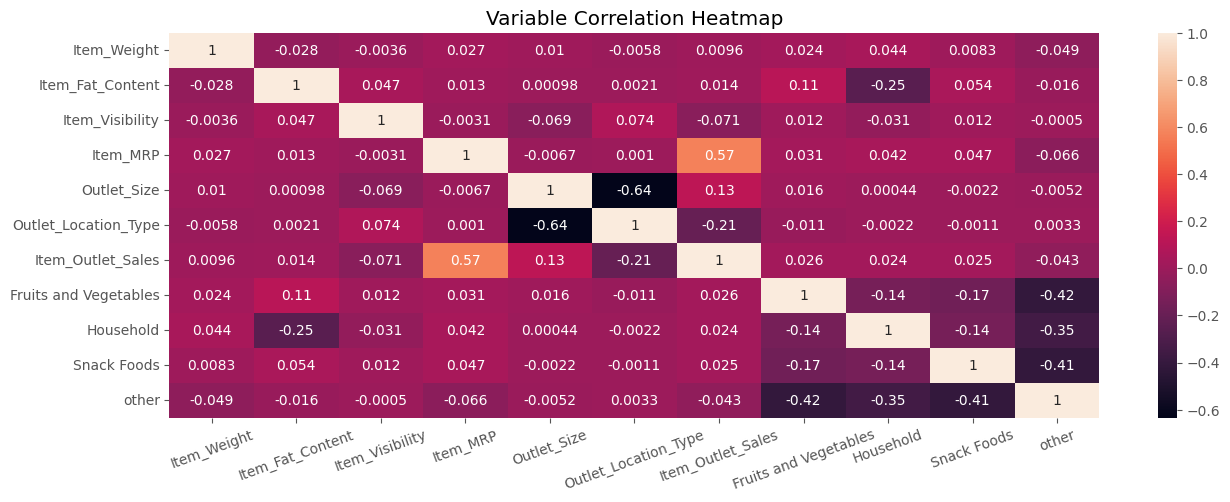

In [258]:
plt.figure(figsize=(15,5))
s_cor = sales.corr()
ax = sns.heatmap(s_cor,annot=True)
ax.set_title('Variable Correlation Heatmap')
plt.xticks(rotation = 20)
plt.show()

**Removing features to control for multicollinearity**

# Splitting data in test and train

In [259]:
x = sales[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 
       'Item_MRP', 'Outlet_Size','Outlet_Location_Type', 'Fruits and Vegetables',
       'Household','Snack Foods','other']]
y = sales['Item_Outlet_Sales']

In [260]:
# Splitting testing and training data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 101)

# Linear Regression Model

In [261]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [262]:
reg.fit(x_train,y_train)

LinearRegression()

In [263]:
reg_prd = reg.predict(x_test)
reg_prd

array([2806.46982458, 3562.46018633, 1844.57637798, ..., -342.4452977 ,
       1213.83786091, 2070.38104418])

In [264]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE", mean_absolute_error(y_test, reg_prd))
print("MSE", mean_squared_error(y_test, reg_prd))
print("RMAE", np.sqrt(mean_absolute_error(y_test, reg_prd)))
print("R2 Score", r2_score(y_test, reg_prd))
r2 = r2_score(y_test, reg_prd)

MAE 1058.6466664773045
MSE 1944181.0835418457
RMAE 32.53685089982287
R2 Score 0.38627960722808574


In [265]:
# Adjusted R2 score
x_test.shape

(1834, 10)

In [266]:
1-((1-r2)*(1834-1)/(1834-1-10))

0.38291306640103184

# Homoscedasticity

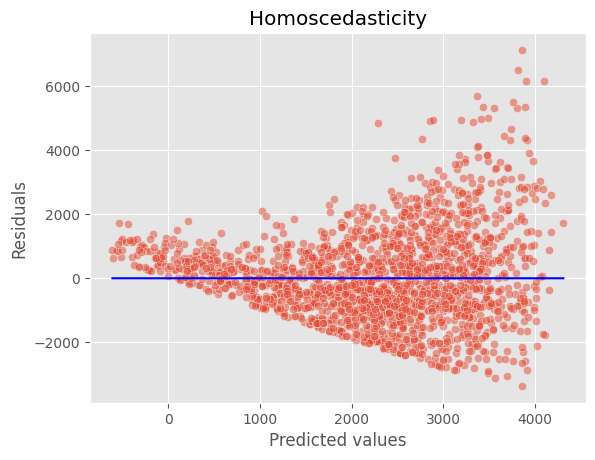

In [267]:
resid_val = y_test - reg_prd

sns.scatterplot(x=reg_prd, y=resid_val, alpha=0.5)
sns.lineplot(x=reg_prd, y=0, color='blue') 
plt.title('Homoscedasticity')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

**As we see our residuals spread out as the predicted values increase but our regression has Heteroscedasticity**

# Decision Tree Model

In [268]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()

In [269]:
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [270]:
dt_prediction = dt_reg.predict(x_test)

In [271]:
print("MAE", mean_absolute_error(y_test, dt_prediction))
print("MSE", mean_squared_error(y_test, dt_prediction))
print("RMAE", np.sqrt(mean_absolute_error(y_test, dt_prediction)))
print("R2 Score", r2_score(y_test, dt_prediction))
r2 = r2_score(y_test, dt_prediction)

MAE 1111.3254791712104
MSE 2535810.146087939
RMAE 33.33654869915616
R2 Score 0.199519832783828


In [272]:
1-((1-r2)*(1834-1)/(1834-1-10))

0.19512882802674536

# Random Forest Regression

In [273]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [274]:
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [275]:
rf_prediction = rf_model.predict(x_test) 

In [276]:
print("MAE", mean_absolute_error(y_test, rf_prediction))
print("MSE", mean_squared_error(y_test, rf_prediction))
print("RMAE", np.sqrt(mean_absolute_error(y_test, rf_prediction)))
print("R2 Score", r2_score(y_test, rf_prediction))
r2 = r2_score(y_test, rf_prediction)

MAE 828.3553350130861
MSE 1396057.9311590726
RMAE 28.78116285025826
R2 Score 0.5593058542250491


In [277]:
1-((1-r2)*(1834-1)/(1834-1-10))

0.5568884425641882

# XgBoosting

In [278]:
from sklearn.ensemble import GradientBoostingRegressor
xgboost = GradientBoostingRegressor()

In [279]:
xgboost.fit(x_train,y_train)

GradientBoostingRegressor()

In [280]:
xg_prd = xgboost.predict(x_test)

In [281]:
print("MAE", mean_absolute_error(y_test, xg_prd))
print("MSE", mean_squared_error(y_test, xg_prd))
print("RMAE", np.sqrt(mean_absolute_error(y_test, xg_prd)))
print("R2 Score", r2_score(y_test, xg_prd))
r2 = r2_score(y_test, xg_prd)

MAE 858.4311921857736
MSE 1397836.0723087557
RMAE 29.29899643649546
R2 Score 0.5587445477222621


In [282]:
1-((1-r2)*(1834-1)/(1834-1-10))

0.5563240570350556